(smoothing)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Consumption Smoothing with Complete and Incomplete Markets

```{index} single: Consumption; Tax
```

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture uses the  library:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/share/miniconda3/envs/qe-lectures/lib/python3.8/site-packages (0.4.8)


## Overview

This lecture describes two types of consumption-smoothing models.

{cite}`Hall1978`* one is in the **complete markets** tradition of Kenneth Arrow <https://en.wikipedia.org/wiki/Kenneth_Arrow>
* the other is in the **incomplete markets** tradition  of Hall 

*Complete markets* allow a consumer  to buy or sell claims contingent on all possible states of the world.

*Incomplete markets* allow a consumer to buy or sell only a limited set of securities, often only a single risk-free security.

Hall {cite}`Hall1978` worked in an incomplete markets tradition by assuming
that the only asset that can be traded is a risk-free one period bond.

Hall assumed an exogenous stochastic process of nonfinancial income and
an exogenous and time-invariant gross interest rate on one period risk-free debt that equals
$\beta^{-1}$, where $\beta \in (0,1)$ is also a consumer's
intertemporal discount factor.

This is equivalent to saying that  it costs $\beta^{-1}$ of  time $t$ consumption to buy one unit of consumption at time $t+1$ for sure.

So $\beta^{-1}$ is the price of a one-period risk-free claim to consumption next period.

We maintain Hall's assumption about the interest rate when we describe an
incomplete markets version of our model.

In addition, we extend Hall's assumption about the risk-free interest rate to its appropriate counterpart when we create another model in which there are markets
in a complete array of one-period Arrow state-contingent securities.

We'll consider two closely related but distinct alternative assumptions about the consumer's
exogenous nonfinancial income process:

* that it is generated by  a finite $N$ state Markov chain (setting $N=2$ most of the time in this lecture)
* that it is described by a linear state space model with a continuous
  state vector in ${\mathbb R}^n$ driven by a Gaussian vector IID shock
  process

We'll spend most of this lecture studying the finite-state Markov specification, but will begin by studying the linear state space specification because it
is so closely linked to earlier lectures.

Let's start with some imports:

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la

### Relationship to Other Lectures

This lecture can be viewed as a followup to [Optimal Savings II: LQ Techniques](https://python-intro.quantecon.org/perm_income_cons.html)

This lecture is also a prologomenon to a lecture on tax-smoothing {doc}`smoothing_tax <smoothing_tax>`

## Background

Outcomes in consumption-smoothing  models emerge from two
sources:

* a consumer who wants to maximize an
  intertemporal objective function that expresses its preference for
  paths of consumption that are *smooth* in the
  sense of  varying as little as possible both  across time and across realized Markov states
* opportunities that allow the consumer to transform
  an erratic nonfinancial income
  process into a smoother consumption process by
  purchasing or selling  one or more financial securities

In the **complete markets version**, each period the consumer
can buy or sell a complete set of one-period ahead state-contingent securities whose
payoffs depend on next period's realization of the Markov state.

* In the two-state Markov chain case,  two such securities are traded  each period.
* In an $N$ state Markov state version,  $N$ such securities are traded each period.
* In a continuous state Markov state version, a continuum of such securities are traded each period.

These state-contingent securities are commonly called Arrow securities, after Kenneth Arrow <https://en.wikipedia.org/wiki/Kenneth_Arrow>

In the **incomplete markets version**, the consumer can buy and sell only one security each period, a risk-free one-period bond with gross
one-period return $\beta^{-1}$.

## Linear State Space Version of Complete Markets Model

We'll study a complete markets model adapted to  a setting with a continuous Markov state like that in the [first lecture on the permanent income model](https://python-intro.quantecon.org/perm_income.html).

In that model

* a consumer can trade only a single risk-free one-period bond bearing gross one-period risk-free interest rate equal to $\beta^{-1}$.
* a consumer's exogenous nonfinancial income is governed by a linear state space model driven by Gaussian shocks, the kind of model studied in an earlier lecture about [linear state space models](https://python-intro.quantecon.org/linear_models.html).

Let's write down a complete markets counterpart of that model.

Suppose that nonfinancial income is governed by the state
space system

$$
\begin{aligned}
     x_{t+1} & = A x_t + C w_{t+1} \cr
     y_t & = S_y x_t
\end{aligned}
$$

where $x_t$ is an $n \times 1$ vector and $w_{t+1} \sim {\cal N}(0,I)$ is IID over time.

We want  a natural counterpart of the Hall assumption that the one-period risk-free
gross interest rate is $\beta^{-1}$.

We make the good guess that   prices
of one-period ahead Arrow securities are described by the **pricing kernel**

```{math}
:label: cs_14

q_{t+1}(x_{t+1} \,|\, x_t) = \beta \phi(x_{t+1} \,|\, A x_t, CC')
```

where $\phi(\cdot \,|\, \mu, \Sigma)$ is a multivariate Gaussian
distribution with mean vector $\mu$ and covariance matrix
$\Sigma$.

With the pricing kernel $q_{t+1}(x_{t+1} \,|\, x_t)$ in hand, we can price claims to consumption at time $t+1$ consumption that pay off when
$x_{t+1} \in S$ at time $t+1$:

$$
\int_S q_{t+1}(x_{t+1} \,|\, x_t) d x_{t+1}
$$

where $S$ is a subset of $\mathbb R^n$.

The price $\int_S q_{t+1}(x_{t+1} \,|\, x_t) d x_{t+1}$ of such a claim depends on state $x_t$ because the prices of the $x_{t+1}$-contingent
securities depend on $x_t$ through the pricing kernel $q(x_{t+1} \,|\, x_t)$.

Let $b(x_{t+1})$ be a vector of state-contingent debt due at $t+1$
as a function of the $t+1$ state $x_{t+1}$.

Using the pricing kernel assumed in {eq}`cs_14`, the value at
$t$ of $b(x_{t+1})$ is evidently

$$
\beta \int b(x_{t+1}) \phi(x_{t+1} \,|\, A x_t, CC') d x_{t+1} = \beta  \mathbb E_t b_{t+1}
$$

In our complete markets setting, the consumer faces a sequence of budget
constraints

$$
c_t + b_t = y_t + \beta \mathbb E_t b_{t+1}, \quad t \geq 0
$$

Please note that

$$
E_t b_{t+1} = \int \phi_{t+1}(x_{t+1} | A x_t, C C') b_{t+1}(x_{t+1}) d x_{t+1}
$$

which verifies that $E_t b_{t+1}$ is the **value** of time $t+1$ state-contingent claims on time $t+1$ consumption issued by the consumer at time $t$

We can solve the time $t$ budget constraint forward to obtain

$$
b_t = \mathbb E_t  \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j} )
$$

The consumer cares about the expected value
of

$$
\sum_{t=0}^\infty \beta^t u(c_t), \quad 0 < \beta < 1
$$

In the incomplete markets version of the model, we assumed that
$u(c_t) = - (c_t -\gamma)^2$, so that the above utility functional
became

$$
-\sum_{t=0}^\infty \beta^t ( c_t - \gamma)^2, \quad 0 < \beta < 1
$$

But in the complete markets version, it is tractable to assume a more general utility function that satisfies $u' > 0$ and $u'' < 0$.

The first-order conditions for the consumer's problem with complete
markets and our assumption about Arrow securities prices are

$$
u'(c_{t+1}) = u'(c_t) \quad \text{for all }  t\geq 0
$$

which  implies $c_t = \bar c$ for some $\bar c$.

So it follows that

$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j (y_{t+j} - \bar c)
$$

or

```{math}
:label: cs_15

b_t = S_y (I - \beta A)^{-1} x_t - \frac{1}{1-\beta} \bar c
```

where $\bar c$ satisfies

```{math}
:label: cs_16

\bar b_0 = S_y (I - \beta A)^{-1} x_0 - \frac{1}{1 - \beta } \bar c
```

where $\bar b_0$ is an initial level of the consumer's debt due at time $t=0$, specified
as a parameter of the problem.

Thus, in the complete markets version of the consumption-smoothing
model, $c_t = \bar c, \forall t \geq 0$ is determined by {eq}`cs_16`
and the consumer's debt is the fixed function of
the state $x_t$ described by {eq}`cs_15`.

Please recall that in the LQ permanent income model studied in  [permanent income model](https://python-intro.quantecon.org/perm_income.html), the state is
$x_t, b_t$, where $b_t$ is a complicated function of past state vectors $x_{t-j}$.

Notice that in contrast to that incomplete markets model, at time $t$ the state vector is $x_t$ alone  in our complete markets model.

Here's an example that shows how in this setting the availability of insurance against fluctuating nonfinancial income
allows the consumer completely to smooth consumption across time and across states of the world

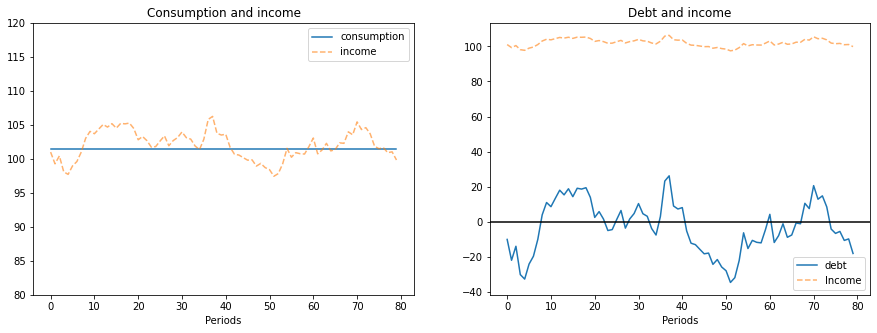

In [3]:
def complete_ss(β, b0, x0, A, C, S_y, T=12):
    """
    Computes the path of consumption and debt for the previously described
    complete markets model where exogenous income follows a linear
    state space
    """
    # Create a linear state space for simulation purposes
    # This adds "b" as a state to the linear state space system
    # so that setting the seed places shocks in same place for
    # both the complete and incomplete markets economy
    # Atilde = np.vstack([np.hstack([A, np.zeros((A.shape[0], 1))]),
    #                   np.zeros((1, A.shape[1] + 1))])
    # Ctilde = np.vstack([C, np.zeros((1, 1))])
    # S_ytilde = np.hstack([S_y, np.zeros((1, 1))])

    lss = qe.LinearStateSpace(A, C, S_y, mu_0=x0)

    # Add extra state to initial condition
    # x0 = np.hstack([x0, np.zeros(1)])

    # Compute the (I - β * A)^{-1}
    rm = la.inv(np.eye(A.shape[0]) - β * A)

    # Constant level of consumption
    cbar = (1 - β) * (S_y @ rm @ x0 - b0)
    c_hist = np.ones(T) * cbar

    # Debt
    x_hist, y_hist = lss.simulate(T)
    b_hist = np.squeeze(S_y @ rm @ x_hist - cbar / (1 - β))


    return c_hist, b_hist, np.squeeze(y_hist), x_hist


# Define parameters
N_simul = 80
α, ρ1, ρ2 = 10.0, 0.9, 0.0
σ = 1.0

A = np.array([[1., 0., 0.],
            [α,  ρ1, ρ2],
            [0., 1., 0.]])
C = np.array([[0.], [σ], [0.]])
S_y = np.array([[1,  1.0, 0.]])
β, b0 = 0.95, -10.0
x0 = np.array([1.0, α / (1 - ρ1), α / (1 - ρ1)])

# Do simulation for complete markets
s = np.random.randint(0, 10000)
np.random.seed(s)  # Seeds get set the same for both economies
out = complete_ss(β, b0, x0, A, C, S_y, 80)
c_hist_com, b_hist_com, y_hist_com, x_hist_com = out

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Consumption plots
ax[0].set_title('Consumption and income')
ax[0].plot(np.arange(N_simul), c_hist_com, label='consumption')
ax[0].plot(np.arange(N_simul), y_hist_com, label='income', alpha=.6, linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Periods')
ax[0].set_ylim([80, 120])

# Debt plots
ax[1].set_title('Debt and income')
ax[1].plot(np.arange(N_simul), b_hist_com, label='debt')
ax[1].plot(np.arange(N_simul), y_hist_com, label='Income', alpha=.6, linestyle='--')
ax[1].legend()
ax[1].axhline(0, color='k')
ax[1].set_xlabel('Periods')

plt.show()

### Interpretation of Graph

In the above graph, please note that:

- nonfinancial income fluctuates in a stationary manner.
- consumption is completely constant.
- the consumer's debt fluctuates in a stationary manner; in fact, in
  this case, because nonfinancial income is a first-order
  autoregressive process, the consumer's debt is an exact affine function
  (meaning linear plus a constant) of the consumer's nonfinancial
  income.

### Incomplete Markets Version

The incomplete markets version of the model with nonfinancial income being governed by a linear state space system
is described in  [permanent income model](https://python-intro.quantecon.org/perm_income.html) and a followup
lecture on  the [permanent income model](https://python-intro.quantecon.org/perm_income_cons.html).

In that incomplete markerts setting, consumption follows a random walk and the consumer's debt follows a process with a unit root.

### Finite State Markov Income Process

We now turn to a finite-state Markov version of the model in which the consumer's  nonfinancial income is an exact function of a Markov state that
takes one of $N$ values.

We'll start with a setting in which in each version of our consumption-smoothing model, nonfinancial income is governed by a two-state Markov chain
(it's easy to generalize this to an $N$ state Markov chain).

In particular, the *state*  $s_t \in \{1, 2\}$  follows
a Markov chain with transition probability matrix

$$
P_{ij} = \mathbb P \{s_{t+1} = j \,|\, s_t = i \}
$$

where $\mathbb P$ means conditional probability

Nonfinancial income $\{y_t\}$ obeys

$$
y_t =
\begin{cases}
    \bar y_1 & \quad \text{if } s_t = 1 \\
    \bar y_2 & \quad \text{if } s_t = 2
\end{cases}
$$

A consumer wishes to maximize

```{math}
:label: cs_1

\mathbb E
\left[
    \sum_{t=0}^\infty \beta^t u(c_t)
\right]
\quad
\text{where} \quad
u(c_t) = - (c_t -\gamma)^2
\quad \text{and} \quad
 0 < \beta < 1
```

Here $\gamma >0$ is a bliss level of consumption

### Market Structure

Our complete and incomplete markets models  differ in how thoroughly the market structure allows a
consumer to transfer resources across time and Markov states, there
being more transfer opportunities in the complete markets setting than
in the incomplete markets setting.

Watch how these differences in opportunities affect

- how smooth consumption is across time and Markov states
- how the consumer chooses to make his levels of indebtedness behave
  over time and across Markov states

## Model 1 (Complete Markets)

At each date $t \geq 0$, the consumer trades a full array of **one-period ahead
Arrow securities**.

We assume that prices of these securities are exogenous to the consumer.

*Exogenous* means that they are unaffected by the consumer's decisions.

In Markov state $s_t$ at time $t$, one unit of consumption
in state $s_{t+1}$ at time $t+1$ costs $q(s_{t+1} \,|\, s_t)$ units of the time $t$ consumption good.

The prices $q(s_{t+1} \,|\, s_t)$ are given and can be organized into a matrix $Q$ with $Q_{ij} = q(j | i)$

At time $t=0$, the consumer starts with an inherited level of debt
due at time $0$ of $b_0$ units of time $0$ consumption
goods.

The consumer's budget constraint at $t \geq 0$ in Markov
state $s_t$ is

```{math}
:label: cs_budget1

c_t + b_t
\leq y(s_t) +
\sum_j  q(j \,|\, s_t ) \, b_{t+1}( j \,|\, s_t)
```

where $b_t$ is the consumer's one-period debt that falls due at time $t$ and  $b_{t+1}(j\,|\, s_t)$ are the consumer's time
$t$ sales of the  time $t+1$ consumption good in Markov state $j$.

These are

* when multiplied by $q(j\,|\, s_t)$, a source of time $t$ **revenues** for the consumer
* when $s_{t+1} = j$, a source of time $t+1$ **expenditures** for the consumer

A natural analog of Hall's assumption that the one-period risk-free gross
interest rate is $\beta^{-1}$ is

```{math}
:label: cs_2

q(j \,|\, i) = \beta P_{ij}
```

To understand how this is a natural analogue, observe that in state $i$ it costs $\sum_j q(j \,|\, i)$  to purchase one unit of consumption next period *for sure*, i.e., meaning no matter what state of the world  occurs at $t+1$.

Hence the **implied price** of a risk-free claim on one unit of consumption next
period is

$$
\sum_j q(j \,|\, i) =  \sum_j \beta P_{ij} =  \beta
$$

This confirms the sense in which  {eq}`cs_2` is a natural counterpart to Hall's assumption that the
risk-free one-period gross interest rate is $R = \beta^{-1}$.

It is timely please to recall that the gross one-period risk-free interest rate is the reciprocal of the price at time $t$ of a risk-free claim on
one unit of consumption tomorrow.

First-order necessary conditions for maximizing the consumer's expected utility subject to the sequence of budget constraints {eq}`cs_budget1` are

$$
\beta \frac{u'(c_{t+1})}{u'(c_t) } \mathbb P\{s_{t+1}\,|\, s_t \}
    = q(s_{t+1} \,|\, s_t)
$$

for all $s_t, s_{t+1}$

or, under our assumption {eq}`cs_2` about the values taken by  Arrow security prices,

```{math}
:label: cs_3

c_{t+1} = c_t
```

Thus, our consumer sets $c_t = \bar c$ for all $t \geq 0$ for some value $\bar c$ that it is our job now to determine along with
values for $b_{t+1}(j | s_t = i)$ for $i=1,2$ and $j = 1,2$

We'll use a *guess and verify* method to determine these objects

**Guess:** We'll make the plausible guess that

```{math}
:label: eq_guess

b_{t+1}(s_{t+1} = j \,|\, s_t = i) = b(j) ,
        \quad i=1,2; \;\; j= 1,2
```

so that the amount borrowed today depends only on *tomorrow's* Markov state. (Why is this is a plausible guess?)

To determine $\bar c$, we shall deduce implications of the consumer's budget constraints in each Markov state today and  our guess {eq}`eq_guess` about the consumer's debt level choices.

For $t \geq 1$, these imply

```{math}
:label: cs_4a

\begin{aligned}
    \bar c + b(1) & = y(1) + q(1\,|\, 1) b(1) + q(2 \,|\, 1)  b(2) \cr
    \bar c + b(2) & = y(2) + q(1\,|\, 2) b(1) + q(2 \,|\, 2) b(2)
\end{aligned}
```

or

$$
\begin{bmatrix}
   b(1) \cr b(2)
\end{bmatrix} +
\begin{bmatrix}
\bar c \cr \bar c
\end{bmatrix} =
\begin{bmatrix}
    y(1) \cr y(2)
\end{bmatrix} +
\beta
\begin{bmatrix}
    P_{11} & P_{12} \cr P_{21} & P_{22}
\end{bmatrix}
\begin{bmatrix}
    b(1) \cr b(2)
\end{bmatrix}
$$

These are $2$ equations in the $3$ unknowns
$\bar c, b(1), b(2)$.

To get a third equation, we assume that at time $t=0$, $b_0$
is the debt due; and we assume that at time $t=0$, the Markov
state $s_0 =1$

(We could instead have assumed that at time $t=0$ the Markov state $s_0 = 2$, which would affect our answer as we shall see)

Since we have  assumed that $s_0 = 1$,  the budget constraint at time $t=0$ is

```{math}
:label: cs_5

\bar c + b_0 = y(1) + q(1 \,|\, 1) b(1) + q(2\,|\,1) b(2)
```

where $b_0$ is the (exogenous) debt the consumer is assumed to bring into period $0$

If we substitute  {eq}`cs_5` into the first equation of {eq}`cs_4a` and rearrange, we
discover that

```{math}
:label: cs_6

b(1) = b_0
```

We can then use the second equation of {eq}`cs_4a`  to deduce the restriction

```{math}
:label: cs_7

y(1) - y(2) + [q(1\,|\, 1) - q(1\,|\, 2) - 1 ] b_0 +
[q(2\,|\,1) + 1 - q(2 \,|\, 2) ] b(2) = 0 ,
```

an equation that we can solve for the unknown $b(2)$.

Knowing $b(1)$ and $b(2)$, we can solve equation {eq}`cs_5`  for the constant level of consumption $\bar c$.

### Key Outcomes

The preceding calculations indicate that in the complete markets version
of our model, we obtain the following striking results:

* The consumer chooses to make consumption perfectly constant across
  time and across Markov states.
* State-contingent debt purchases $b_{t+1}(s_{t+1} = j | s_t = i)$ depend only on $j$
* If the initial Markov state is $s_0 =j$ and initial consumer debt is $b_0$, then debt in Markov state $j$ satisfied $b(j) = b_0$

To summarize what we have achieved up to now, we have  computed the constant level of
consumption $\bar c$ and indicated how that level depends on the underlying specifications of preferences, Arrow securities prices,  the stochastic process of exogenous nonfinancial income, and the initial debt level $b_0$

* The consumer's debt neither accumulates, nor decumulates, nor drifts --
  instead, the debt level each period is an exact function of the Markov
  state, so in the two-state Markov case, it switches between two
  values.
* We have verified guess {eq}`eq_guess`.
* When the state $s_t$ returns to the initial state $s_0$, debt returns to the initial debt level.
* Debt levels in all other states depend on virtually all  remaining parameters of the model.

### Code

Here's some code that, among other things, contains a function called consumption_complete().

This function computes $\{ b(i) \}_{i=1}^{N}, \bar c$ as outcomes given a set of parameters for the general case with $N$ Markov states
under the assumption of complete markets

In [4]:
class ConsumptionProblem:
    """
    The data for a consumption problem, including some default values.
    """

    def __init__(self,
                 β=.96,
                 y=[2, 1.5],
                 b0=3,
                 P=[[.8, .2],
                    [.4, .6]],
                 init=0):
        """
        Parameters
        ----------

        β : discount factor
        y : list containing the two income levels
        b0 : debt in period 0 (= initial state debt level)
        P : 2x2 transition matrix
        init : index of initial state s0
        """
        self.β = β
        self.y = np.asarray(y)
        self.b0 = b0
        self.P = np.asarray(P)
        self.init = init

    def simulate(self, N_simul=80, random_state=1):
        """
        Parameters
        ----------

        N_simul : number of periods for simulation
        random_state : random state for simulating Markov chain
        """
        # For the simulation define a quantecon MC class
        mc = qe.MarkovChain(self.P)
        s_path = mc.simulate(N_simul, init=self.init, random_state=random_state)

        return s_path


def consumption_complete(cp):
    """
    Computes endogenous values for the complete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem

    Returns
    -------

        c_bar : constant consumption
        b : optimal debt in each state

    associated with the price system

        Q = β * P
    """
    β, P, y, b0, init = cp.β, cp.P, cp.y, cp.b0, cp.init   # Unpack

    Q = β * P                               # assumed price system

    # construct matrices of augmented equation system
    n = P.shape[0] + 1

    y_aug = np.empty((n, 1))
    y_aug[0, 0] = y[init] - b0
    y_aug[1:, 0] = y

    Q_aug = np.zeros((n, n))
    Q_aug[0, 1:] = Q[init, :]
    Q_aug[1:, 1:] = Q

    A = np.zeros((n, n))
    A[:, 0] = 1
    A[1:, 1:] = np.eye(n-1)

    x = np.linalg.inv(A - Q_aug) @ y_aug

    c_bar = x[0, 0]
    b = x[1:, 0]

    return c_bar, b


def consumption_incomplete(cp, s_path):
    """
    Computes endogenous values for the incomplete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem
    s_path : the path of states
    """
    β, P, y, b0 = cp.β, cp.P, cp.y, cp.b0  # Unpack

    N_simul = len(s_path)

    # Useful variables
    n = len(y)
    y.shape = (n, 1)
    v = np.linalg.inv(np.eye(n) - β * P) @ y

    # Store consumption and debt path
    b_path, c_path = np.ones(N_simul+1), np.ones(N_simul)
    b_path[0] = b0

    # Optimal decisions from (12) and (13)
    db = ((1 - β) * v - y) / β

    for i, s in enumerate(s_path):
        c_path[i] = (1 - β) * (v - b_path[i] * np.ones((n, 1)))[s, 0]
        b_path[i + 1] = b_path[i] + db[s, 0]

    return c_path, b_path[:-1], y[s_path]

Let's test by checking that $\bar c$ and $b_2$ satisfy the budget constraint

In [5]:
cp = ConsumptionProblem()
c_bar, b = consumption_complete(cp)
np.isclose(c_bar + b[1] - cp.y[1] - (cp.β * cp.P)[1, :] @ b, 0)

True

Below, we'll take the outcomes produced by this code -- in particular the implied
consumption and debt paths -- and compare them with outcomes
from an incomplete markets model in the spirit of Hall {cite}`Hall1978`

## Model 2 (One-Period Risk-Free Debt Only)

This is a version of the original models of Hall (1978)
in which the consumer's ability to substitute intertemporally is
constrained by his ability to buy or sell only one security, a risk-free
one-period bond bearing a constant gross interest rate that equals
$\beta^{-1}$.

Given an initial debt  $b_0$ at time $0$, the
consumer faces a sequence of budget constraints

$$
c_t + b_t = y_t + \beta b_{t+1}, \quad t \geq 0
$$

where $\beta$ is the price at time $t$ of a risk-free claim
on one unit of time consumption at time $t+1$.

First-order conditions for the consumer's  problem are

$$
\sum_{j} u'(c_{t+1,j}) P_{ij} = u'(c_{t, i})
$$

For our assumed quadratic utility function this implies

```{math}
:label: cs_8

\sum_j c_{t+1,j} P_{ij} = c_{t,i}
```

which for our finite-state Markov setting is Hall's (1978) conclusion that consumption follows a random walk.

As we saw in our first lecture on the [permanent income model](https://python-intro.quantecon.org/perm_income.html), this leads to

```{math}
:label: cs_9

b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - (1 -\beta)^{-1} c_t
```

and

```{math}
:label: cs_10

c_t = (1-\beta)
    \left[
        \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - b_t
    \right]
```

Equation {eq}`cs_10` expresses $c_t$ as a net interest rate factor $1 - \beta$ times the sum
of the expected present value of nonfinancial income $\mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j}$ and financial wealth $-b_t$.

Substituting {eq}`cs_10`  into the one-period budget constraint and rearranging leads to

```{math}
:label: cs_11

b_{t+1} - b_t
= \beta^{-1} \left[ (1-\beta)
\mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} - y_t    \right]
```

Now let's calculate the key term $\mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j}$ in our finite Markov chain setting.

Define

$$
v_t := \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j}
$$

which in the spirit of dynamic programming we can write as a *Bellman equation*

$$
v_t :=  y_t + \beta \mathbb E_t v_{t+1}
$$

In our two-state Markov chain setting, $v_t = v(1)$ when $s_t= 1$ and $v_t = v(2)$ when $s_t=2$.

Therefore, we can write our Bellman equation as

$$
\begin{aligned}
    v(1) & = y(1) + \beta P_{11} v(1) + \beta P_{12} v(2)
    \\
    v(2) & = y(2) + \beta P_{21} v(1) + \beta P_{22} v(2)
\end{aligned}
$$

or

$$
\vec v = \vec y + \beta P \vec v
$$

where  $\vec v =    \begin{bmatrix} v(1) \cr v(2) \end{bmatrix}$ and  $\vec y =  \begin{bmatrix} y(1) \cr y(2) \end{bmatrix}$.

We can also write the last expression as

$$
\vec v = (I - \beta P)^{-1} \vec y
$$

In our finite Markov chain setting, from expression  {eq}`cs_10`,  consumption at date $t$ when debt is $b_t$ and the Markov state today is $s_t = i$ is evidently

```{math}
:label: cs_12

c(b_t, i) =  (1 - \beta) \left( [(I - \beta P)^{-1} \vec y]_i - b_t \right)
```

and the increment to debt is

```{math}
:label: cs_13

b_{t+1} - b_t = \beta^{-1} [ (1- \beta) v(i) - y(i) ]
```

### Summary of Outcomes

In contrast to outcomes in the complete markets model, in the incomplete
markets model

- consumption drifts over time as a random walk; the level of
  consumption at time $t$ depends on the level of debt that the
  consumer brings into the period as well as the expected discounted
  present value of nonfinancial income at $t$.
- the consumer's debt drifts upward over time in response to low
  realizations of nonfinancial income and drifts downward over time in
  response to high realizations of nonfinancial income.
- the drift over time in the consumer's debt and the dependence of
  current consumption on today's debt level account for the drift over
  time in consumption.

### The Incomplete Markets Model

The code above also contains a function called consumption_incomplete() that uses {eq}`cs_12` and {eq}`cs_13` to

* simulate paths of $y_t, c_t, b_{t+1}$
* plot these against values of $\bar c, b(s_1), b(s_2)$ found in a corresponding  complete markets economy

Let's try this, using the same parameters in both complete and incomplete markets economies

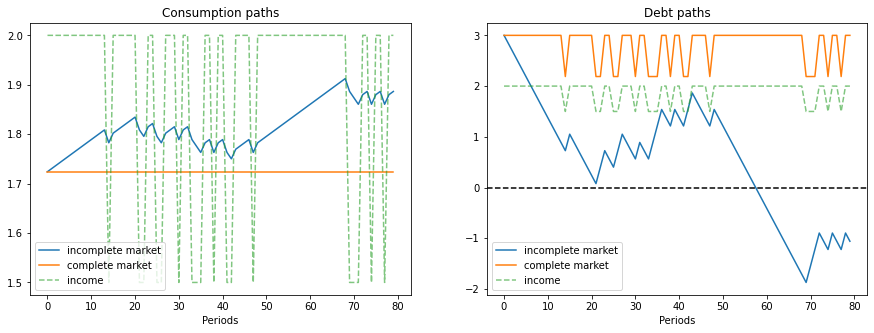

In [6]:
cp = ConsumptionProblem()
s_path = cp.simulate()
N_simul = len(s_path)

c_bar, debt_complete = consumption_complete(cp)

c_path, debt_path, y_path = consumption_incomplete(cp, s_path)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Consumption paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul),
                    label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')

ax[1].set_title('Debt paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path],
           label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show()

In the graph on the left, for the same sample path of nonfinancial
income $y_t$, notice that

* consumption is constant when there are complete markets, but  takes a random walk in the incomplete markets version of the model.
* the consumer's debt oscillates between two values that are functions
  of the Markov state in the complete markets model, while the
  consumer's debt drifts in a "unit root" fashion in the incomplete
  markets economy.

### A sequel

In {doc}`tax smoothing with complete and incomplete markets <smoothing_tax>`, we reinterpret the mathematics and Python code presented in this lecture in order
to construct tax-smoothing models in the incomplete markets tradition of Barro {cite}`Barro1979` as well as in the complete markets tradition of Lucas and Stokey {cite}`LucasStokey1983`.